# Data Pre-processing

In [7]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!wget https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz

!tar -xvzf cifar-10-python.tar.gz
!tar -xvzf cifar-100-python.tar.gz


--2025-11-26 23:16:11--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  76.4MB/s    in 2.1s    

2025-11-26 23:16:13 (76.4 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

--2025-11-26 23:16:13--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz’

cifar-100-python.ta 100%[===================>] 161.17M  76.0MB/s    in 2.1s    

2025-11-26 23:16:15 (7

### Extracting the data

In [4]:
!tar -xvzf cifar-10-python.tar.gz
!tar -xvzf cifar-100-python.tar.gz

tar (child): cifar-10-python.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
tar (child): cifar-100-python.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


### Load CIFAR10

In [2]:
import pickle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def unpickle(file):
    with open(file, 'rb') as f:
        return pickle.load(f, encoding='bytes')

# CIFAR-10
meta10 = unpickle("cifar-10-batches-py/batches.meta")
cifar10_classes = [x.decode('utf-8') for x in meta10[b'label_names']]

print("CIFAR-10 classes:")
for i, name in enumerate(cifar10_classes):
    print(i, name)

CIFAR-10 classes:
0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


### Extract the ids we need for CIFAR-10

In [5]:
cifar10_needed_ids = [1, 2, 3, 4, 5, 7, 9] # automobile, bird, cat, deer, dog, horse, truck

X_train_10 = []
y_train_10 = []

for i in range(1, 6):
    batch = unpickle(f"cifar-10-batches-py/data_batch_{i}")
    X_train_10.append(batch[b'data'])
    y_train_10.append(batch[b'labels'])

X_train_10 = np.concatenate(X_train_10)
y_train_10 = np.concatenate(y_train_10)

# filter only needed CIFAR-10 classes
train_mask_10 = np.isin(y_train_10, cifar10_needed_ids)
X_train_10_filtered = X_train_10[train_mask_10]
y_train_10_filtered = y_train_10[train_mask_10]

# filter CIFAR-10 test batch
test_batch = unpickle("cifar-10-batches-py/test_batch")
X_test_10 = test_batch[b'data']
y_test_10 = np.array(test_batch[b'labels'])

test_mask_10 = np.isin(y_test_10, cifar10_needed_ids)
X_test_10_filtered = X_test_10[test_mask_10]
y_test_10_filtered = y_test_10[test_mask_10]

print(X_train_10_filtered.shape, y_train_10_filtered.shape)
print(X_test_10_filtered.shape, y_test_10_filtered.shape)

(35000, 3072) (35000,)
(7000, 3072) (7000,)


The shape of these matrices make sense as <br>
X_train_10 filtered 50,000 training images and we only took 7 classes out of 10 so that is 35,000, and it has 32px x 32px x 3(RGB) = 3072. y_train_10 filtered is also 35000 <br>
X_test_filtered has 7000 rows which makes sense as we originally had 10000 but took only 7 classes out of 10

### Load CIFAR100

In [6]:
# CIFAR-100
meta100 = unpickle("cifar-100-python/meta")
train_100 = unpickle("cifar-100-python/train")
test_100 = unpickle("cifar-100-python/test")

cifar100_fine_classes = [x.decode('utf-8') for x in meta100[b'fine_label_names']]
cifar100_coarse_classes = [x.decode('utf-8') for x in meta100[b'coarse_label_names']]

trees_coarse_idx = cifar100_coarse_classes.index('trees')

# Checking if our ids are correct

# print("CIFAR-100 fine labels:")
# for i, name in enumerate(cifar100_fine_classes):
#     print(i, name)

# print("\nCIFAR-100 coarse labels:")
# for i, name in enumerate(cifar100_coarse_classes):
#     print(i, name)

cifar100_target_fine = ['cattle', 'fox', 'baby', 'boy', 'girl', 'man', 'woman', 'rabbit', 'squirrel', 'bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train', 'lawn_mower', 'tractor']

# cifar100_needed_ids = [i for i, name in enumerate(cifar100_fine_classes) if name in target_fine_classes]
# print("Selected fine IDs:", cifar100_needed_ids)


### Extract the ids we need for CIFAR-100

In [7]:
X_train_100 = train_100[b'data']
y_train_100_fine = np.array(train_100[b'fine_labels'])
y_train_100_coarse = np.array(train_100[b'coarse_labels'])

X_test_100 = test_100[b'data']
y_test_100_fine = np.array(test_100[b'fine_labels'])
y_test_100_coarse = np.array(test_100[b'coarse_labels'])

def select_and_map_cifar100(X, fine_labels, coarse_labels):
    kept_indices = []
    mapped_names = []
    for i, (f, c) in enumerate(zip(fine_labels, coarse_labels)):
        if c == trees_coarse_idx:
            kept_indices.append(i)
            mapped_names.append('trees')
        else:
            fine_name = cifar100_fine_classes[f]
            if fine_name in cifar100_target_fine:
                kept_indices.append(i)
                mapped_names.append(fine_name)
    X_filtered = X[kept_indices]
    return X_filtered, np.array(mapped_names)

X_train_100_filtered, y_train_100_names = select_and_map_cifar100(
    X_train_100, y_train_100_fine, y_train_100_coarse
)
X_test_100_filtered,  y_test_100_names  = select_and_map_cifar100(
    X_test_100,  y_test_100_fine,  y_test_100_coarse
)

print("CIFAR-100 selected train shape:", X_train_100_filtered.shape, "labels:", y_train_100_names.shape)
print("CIFAR-100 selected test  shape:", X_test_100_filtered.shape,  "labels:", y_test_100_names.shape)

CIFAR-100 selected train shape: (10500, 3072) labels: (10500,)
CIFAR-100 selected test  shape: (2100, 3072) labels: (2100,)


Same here for CIFAR-100, we had 50,000 images but took 17 classes so 8500 images (50000 * 0.7)<br>
The test data had 10,000 but we took 17 so now 1700

### Remapping Label as ID to avoid collision

In [8]:
cifar10_selected_names = [cifar10_classes[i] for i in cifar10_needed_ids]

y_train_10_names = [cifar10_classes[i] for i in y_train_10_filtered]
y_test_10_names  = [cifar10_classes[i] for i in y_test_10_filtered]

cifar100_selected_names_ordered = list(dict.fromkeys(list(y_train_100_names) + list(y_test_100_names)))

cifar100_selected_names_explicit = ['cattle', 'fox', 'baby', 'boy', 'girl', 'man', 'woman', 'rabbit', 'squirrel', 'bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train', 'lawn_mower', 'tractor', 'trees']

all_class_names = list(dict.fromkeys(cifar10_selected_names + cifar100_selected_names_explicit))

label_map = {name: idx for idx, name in enumerate(all_class_names)}

print("Unified class count:", len(label_map))
print("Label map:", label_map)

y_train_10_new = np.array([label_map[name] for name in y_train_10_names])
y_test_10_new  = np.array([label_map[name] for name in y_test_10_names])

y_train_100_new = np.array([label_map[name] for name in y_train_100_names])
y_test_100_new  = np.array([label_map[name] for name in y_test_100_names])

y_train_10_filtered  = y_train_10_new
y_test_10_filtered   = y_test_10_new
y_train_100_filtered = y_train_100_new
y_test_100_filtered  = y_test_100_new

X_train_combined = np.concatenate([X_train_10_filtered, X_train_100_filtered], axis=0)
y_train_combined = np.concatenate([y_train_10_filtered, y_train_100_filtered], axis=0)
X_test_combined  = np.concatenate([X_test_10_filtered,  X_test_100_filtered],  axis=0)
y_test_combined  = np.concatenate([y_test_10_filtered,  y_test_100_filtered],  axis=0)

print("Combined train shape:", X_train_combined.shape, y_train_combined.shape)
print("Combined test shape:",  X_test_combined.shape,  y_test_combined.shape)

print("Unique training labels:", np.unique(y_train_combined))
print("Unique test labels: ", np.unique(y_test_combined))

Unified class count: 24
Label map: {'automobile': 0, 'bird': 1, 'cat': 2, 'deer': 3, 'dog': 4, 'horse': 5, 'truck': 6, 'cattle': 7, 'fox': 8, 'baby': 9, 'boy': 10, 'girl': 11, 'man': 12, 'woman': 13, 'rabbit': 14, 'squirrel': 15, 'bicycle': 16, 'bus': 17, 'motorcycle': 18, 'pickup_truck': 19, 'train': 20, 'lawn_mower': 21, 'tractor': 22, 'trees': 23}
Combined train shape: (45500, 3072) (45500,)
Combined test shape: (9100, 3072) (9100,)
Unique training labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique test labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


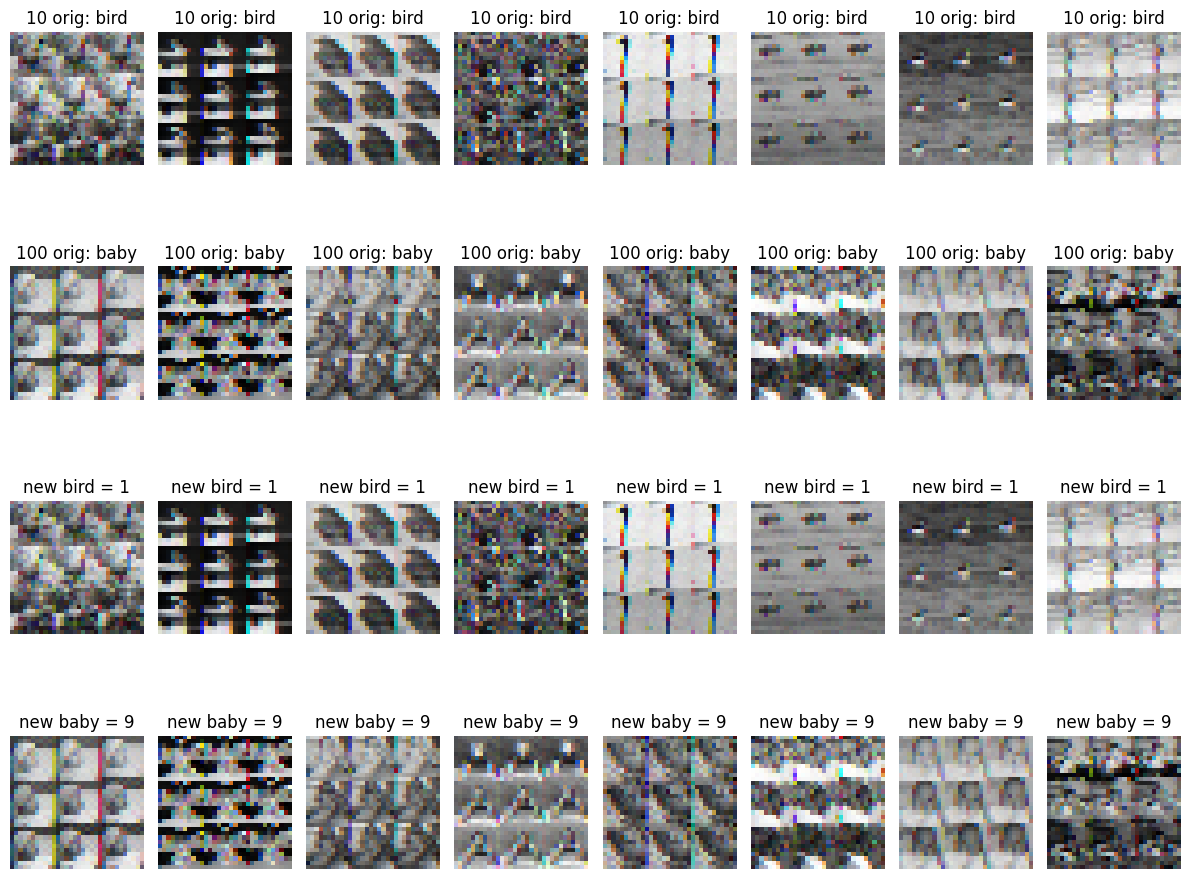

CIFAR-10 'bird' old label 2 -> new label = 1
CIFAR-100 'baby' old label 2 -> new label = 9


In [9]:
orig_class_10 = "bird"
orig_class_100 = "baby"

orig_label_10 = cifar10_classes.index(orig_class_10)
orig_label_100 = cifar100_fine_classes.index(orig_class_100)

# original samples
indices_10_orig = np.where(y_train_10 == orig_label_10)[0][:8]
indices_100_orig = np.where(y_train_100_fine == orig_label_100)[0][:8]

# new mapped labels
new_label_10 = label_map[orig_class_10]
new_label_100 = label_map[orig_class_100]

indices_10_new = np.where(y_train_10_filtered == new_label_10)[0][:8]
indices_100_new = np.where(y_train_100_filtered == new_label_100)[0][:8]

plt.figure(figsize=(12, 10))

# CIFAR-10 original
for i, idx in enumerate(indices_10_orig):
    img = X_train_10[idx].reshape(32,32,3)
    plt.subplot(4, 8, i+1)
    plt.imshow(img)
    plt.title("10 orig: bird")
    plt.axis("off")

# CIFAR-100 original
for i, idx in enumerate(indices_100_orig):
    img = X_train_100[idx].reshape(32,32,3)
    plt.subplot(4, 8, i+1+8)
    plt.imshow(img)
    plt.title("100 orig: baby")
    plt.axis("off")

# CIFAR-10 new label
for i, idx in enumerate(indices_10_new):
    img = X_train_10_filtered[idx].reshape(32,32,3)
    plt.subplot(4, 8, i+1+16)
    plt.imshow(img)
    plt.title(f"new bird = {new_label_10}")
    plt.axis("off")

# CIFAR-100 new label
for i, idx in enumerate(indices_100_new):
    img = X_train_100_filtered[idx].reshape(32,32,3)
    plt.subplot(4, 8, i+1+24)
    plt.imshow(img)
    plt.title(f"new baby = {new_label_100}")
    plt.axis("off")

plt.tight_layout()
plt.show()

print(f"CIFAR-10 'bird' old label 2 -> new label = {new_label_10}")
print(f"CIFAR-100 'baby' old label 2 -> new label = {new_label_100}")


### Combine CIFAR-10 and CIFAR-100 and save files

In [10]:
X_train_combined = np.concatenate([X_train_10_filtered, X_train_100_filtered])
y_train_combined = np.concatenate([y_train_10_filtered, y_train_100_filtered])

X_test_combined = np.concatenate([X_test_10_filtered, X_test_100_filtered])
y_test_combined = np.concatenate([y_test_10_filtered, y_test_100_filtered])

print(X_train_combined.shape, y_train_combined.shape)
print(X_test_combined.shape, y_test_combined.shape)

os.makedirs('combined', exist_ok=True)

train_data = {'features': X_train_combined, 'labels': y_train_combined}
test_data  = {'features': X_test_combined, 'labels': y_test_combined}

# 0.1 for 10% of training split
val_split = int(0.1 * X_train_combined.shape[0])
val_data = {'features': X_train_combined[:val_split], 'labels': y_train_combined[:val_split]}
train_data = {'features': X_train_combined[val_split:], 'labels': y_train_combined[val_split:]}

with open('combined/train.p', 'wb') as f:
    pickle.dump(train_data, f)
with open('combined/valid.p', 'wb') as f:
    pickle.dump(val_data, f)
with open('combined/test.p', 'wb') as f:
    pickle.dump(test_data, f)

(45500, 3072) (45500,)
(9100, 3072) (9100,)


Now we are reading in the train_data, val_data and test_data that we just created and checking the shape

In [11]:
with open('combined/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('combined/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('combined/test.p', 'rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(40950, 3072) (4550, 3072) (9100, 3072)
(40950,) (4550,) (9100,)


We need to reshape it to the correct size to be able to apply pre-processing to it

In [12]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_val = X_val.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

print(X_train.shape, X_val.shape, X_test.shape)

(40950, 32, 32, 3) (4550, 32, 32, 3) (9100, 32, 32, 3)


### Data Pre-processing

In [13]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def equalize(img):
    return cv2.equalizeHist(img)

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255.0
    return img


### Displaying each

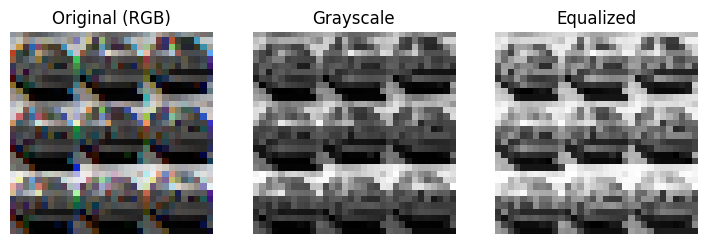

In [14]:
random_index = 555
img_original = X_train[random_index]

img_gray = grayscale(img_original)
img_equalized = equalize(img_gray)
img_normalized = img_equalized / 255.0

plt.figure(figsize=(12, 3))

# our orignial image
plt.subplot(1, 4, 1)
plt.imshow(img_original)
plt.title("Original (RGB)")
plt.axis("off")

# grayscale
plt.subplot(1, 4, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

# equalized
plt.subplot(1, 4, 3)
plt.imshow(img_equalized, cmap='gray')
plt.title("Equalized")
plt.axis("off")

plt.show()

### Reshaping

In [15]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

# Data Exploration

In [16]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (40950, 32, 32, 1) (40950,)
Validation set shape: (4550, 32, 32, 1) (4550,)
Test set shape: (9100, 32, 32, 1) (9100,)


In [17]:
print("Unique CIFAR-10 labels:", np.unique(y_train_10_filtered))
print("Unique CIFAR-100 labels:", np.unique(y_train_100_filtered))
print("Combined:", np.unique(y_train_combined))


Unique CIFAR-10 labels: [0 1 2 3 4 5 6]
Unique CIFAR-100 labels: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Combined: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Number of classes: 24


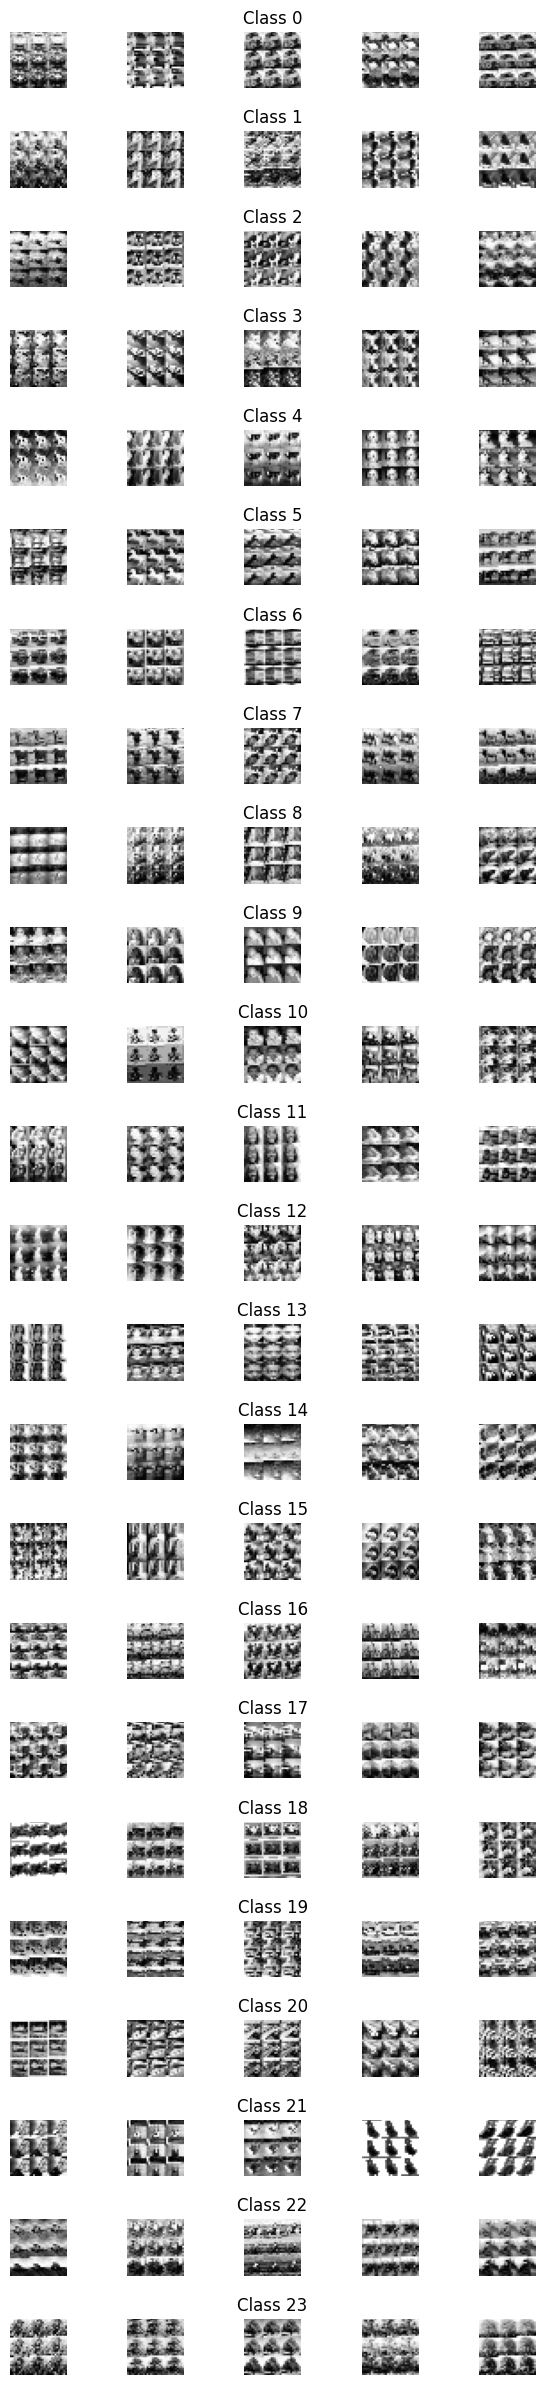

In [18]:
num_of_samples = []
cols = 5
classes = np.unique(y_train)
num_classes = len(classes)
print("Number of classes:", num_classes)

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(6, num_classes))
fig.tight_layout(pad=1)

for class_id_idx, class_id in enumerate(classes):
    x_selected = X_train[y_train == class_id]

    num_of_samples.append(len(x_selected))

    for col in range(cols):
        axs[class_id_idx][col].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :, 0], cmap='gray')
        axs[class_id_idx][col].axis("off")

        if col == cols // 2:
            axs[class_id_idx][col].set_title(f"Class {class_id}")

plt.show()


[4397, 4326, 4360, 4323, 4363, 4351, 4330, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 2500]


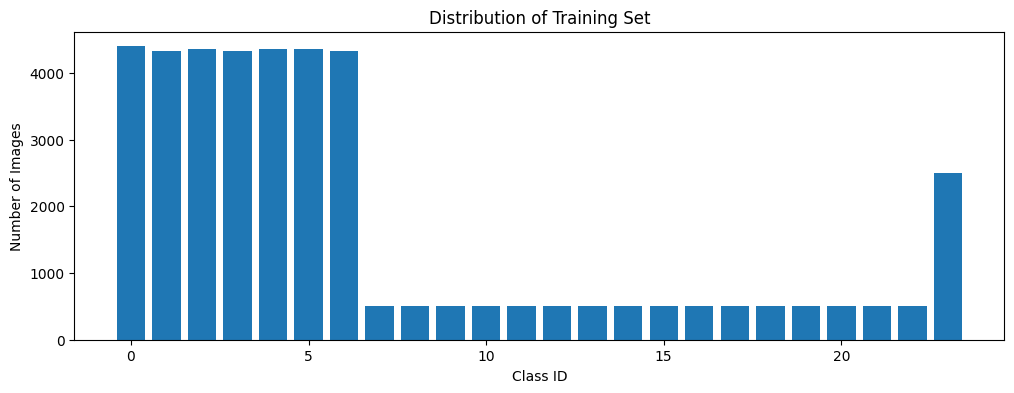

In [19]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(classes, num_of_samples)
plt.title("Distribution of Training Set")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

### What size are the images and what classes do the images represent?

The images were size 32, 32, 3 which represents 32 pixels x 32 pixels x RGB
After preprocessing (grayscale, equalisation and normalisation) they became 32, 32, 1 since they are no longer in colour.
The classes represent the 7 classes selected for CIFAR10 and 21 classes selected from CIFAR100, making 28 classes total.

### Comment on relative numbers of each type of image

Having observed the distribution of Training Set of both CIFAR 10 and CIFAR 100 above, we can clearly see a huge differene in the number of images between CIFAR 10 and CIFAR 100.

The output of the number of samples is this: [4397, 4326, 4360, 4323, 4363, 4351, 4330, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]

The first 7 classes are from CIFAR10, around 4300, and the rest with 500 each are from CIFAR100. This imbalance can bias the model towards classes with more samples leading to higher accuracy for CIFAR10 classes but lower accuracy for CIFAR100 classes.

There are a few ways that we could address this class imbalance:
 - Data Augmentation to increase the number of images in the CIFAR100 classes to balance the training set by use of flips, noise, cropping, brightness, etc
 - Oversampling for the CIFAR100 images by duplicating them to increase their size and balance the training set
 - Class weights during training, address class imbalance by assigning a higher importance to CIFAR100 classes

We have decided to perform Data Augmentation during Model Building to address class imbalance.

### Data Augmentation Demonstration (John's)

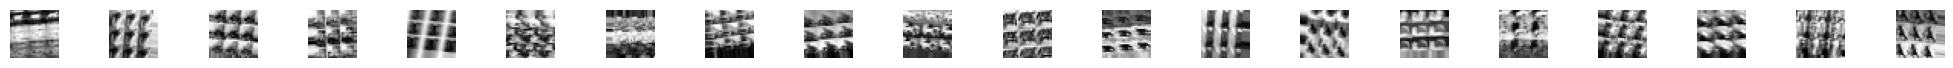

In [20]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range = 0.1, zoom_range = 0.2, shear_range = 0.1, rotation_range=10)
datagen.fit(X_train)
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 20, figsize=(20, 5))
fig.tight_layout()
for i in range(20):
  axs[i].imshow(X_batch[i].reshape(32, 32), cmap='gray')
  axs[i].axis('off')

### Data Augmentation

In [25]:
TARGET_COUNT = 4300

X_train_balanced = []
y_train_balanced = []

classes = np.unique(y_train)

for c in classes:
    idx = np.where(y_train == c)[0]
    X_c = X_train[idx]
    y_c = y_train[idx]

    if len(X_c) >= TARGET_COUNT:
        X_train_balanced.append(X_c)
        y_train_balanced.append(y_c)
        continue

    needed = TARGET_COUNT - len(X_c)
    print(f"Class {c}: generating {needed} augmented images...")

    gen = datagen.flow(X_c, y_c, batch_size=32, shuffle=True)

    X_aug = []
    y_aug = []

    while len(X_aug) < needed:
        X_batch, y_batch = next(gen)
        X_aug.append(X_batch)
        y_aug.append(y_batch)

    X_aug = np.concatenate(X_aug)[:needed]
    y_aug = np.concatenate(y_aug)[:needed]

    X_train_balanced.append(np.concatenate([X_c, X_aug]))
    y_train_balanced.append(np.concatenate([y_c, y_aug]))

X_train = np.concatenate(X_train_balanced)
y_train = np.concatenate(y_train_balanced)

print("New training set:", X_train.shape, y_train.shape)


Class 7: generating 3800 augmented images...
Class 8: generating 3800 augmented images...
Class 9: generating 3800 augmented images...
Class 10: generating 3800 augmented images...
Class 11: generating 3800 augmented images...
Class 12: generating 3800 augmented images...
Class 13: generating 3800 augmented images...
Class 14: generating 3800 augmented images...
Class 15: generating 3800 augmented images...
Class 16: generating 3800 augmented images...
Class 17: generating 3800 augmented images...
Class 18: generating 3800 augmented images...
Class 19: generating 3800 augmented images...
Class 20: generating 3800 augmented images...
Class 21: generating 3800 augmented images...
Class 22: generating 3800 augmented images...
Class 23: generating 1800 augmented images...
New training set: (103550, 32, 32, 1) (103550,)


In [26]:
save_path = "combined"
os.makedirs(save_path, exist_ok=True)

train_balanced_data = {
    "features": X_train,
    "labels": y_train
}

with open(os.path.join(save_path, "train_balanced.p"), "wb") as f:
    pickle.dump(train_balanced_data, f)

print("Saved to:", os.path.join(save_path, "train_balanced.p"))
print("Saved shape:", X_train.shape, y_train.shape)

Saved to: combined\train_balanced.p
Saved shape: (103550, 32, 32, 1) (103550,)


### Load saved "train_balanced.p"

In [27]:
# Load the balanced training dataset
with open("combined/train_balanced.p", "rb") as f:
    data = pickle.load(f)

X_train = data["features"]
y_train = data["labels"]

print("Loaded balanced dataset:", X_train.shape, y_train.shape)


Loaded balanced dataset: (103550, 32, 32, 1) (103550,)


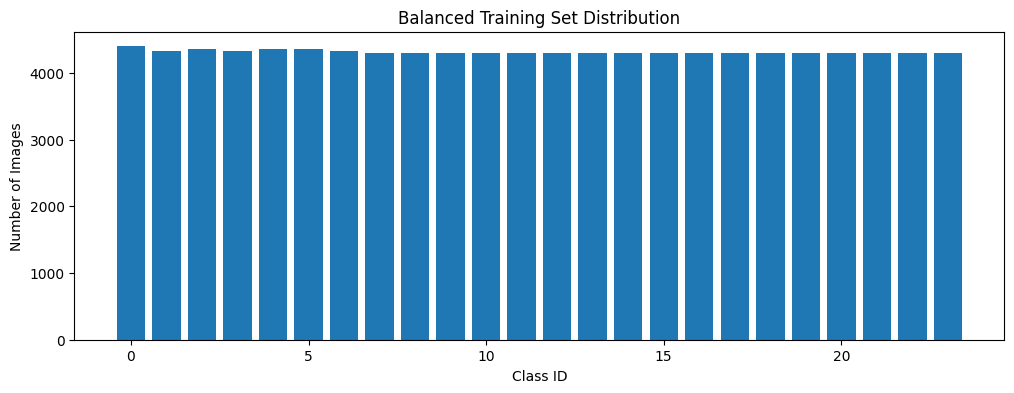

[4397, 4326, 4360, 4323, 4363, 4351, 4330, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300]


In [28]:
classes = np.unique(y_train)
num_samples_new = [len(np.where(y_train == c)[0]) for c in classes]

plt.figure(figsize=(12, 4))
plt.bar(classes, num_samples_new)
plt.title("Balanced Training Set Distribution")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

print(num_samples_new)


### Model Training (Underfitting)

In [31]:
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

def leNet_model_underfit():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(32,32,1),  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = leNet_model_underfit()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1080)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 500)            │       540,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 24)             │        12,024 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 570,314 (2.18 MB)

 Trainable params: 570,314 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 172s 83ms/step - accuracy: 0.2900 - loss: 2.2414 - val_accuracy: 0.4938 - val_loss: 1.5698
Epoch 2/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 167s 80ms/step - accuracy: 0.3200 - loss: 2.1370 - val_accuracy: 0.5196 - val_loss: 1.4806
Epoch 3/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 169s 81ms/step - accuracy: 0.3399 - loss: 2.0754 - val_accuracy: 0.5193 - val_loss: 1.4633
Epoch 4/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 166s 80ms/step - accuracy: 0.3501 - loss: 2.0342 - val_accuracy: 0.5242 - val_loss: 1.4590
Epoch 5/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 202s 80ms/step - accuracy: 0.3620 - loss: 1.9906 - val_accuracy: 0.5281 - val_loss: 1.4451
Epoch 6/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 167s 81ms/step - accuracy: 0.3766 - loss: 1.9379 - val_accuracy: 0.5424 - val_loss: 1.4348
Epoch 7/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 208s 83ms/step - accuracy: 0.3893 - loss: 1.9059 - val_accuracy: 0.5514 - val_loss: 1.3693
Epoch 8/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 170s 82ms/step - accuracy: 

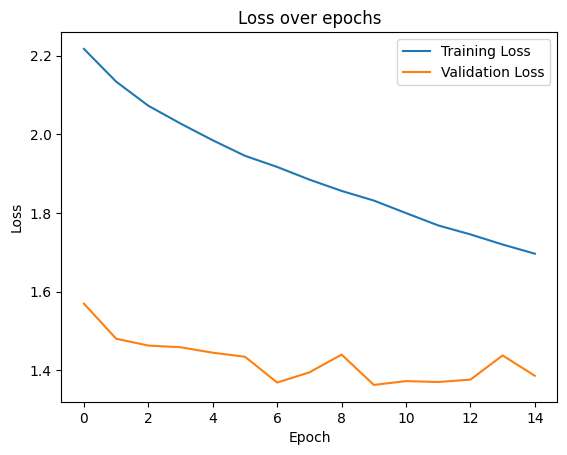

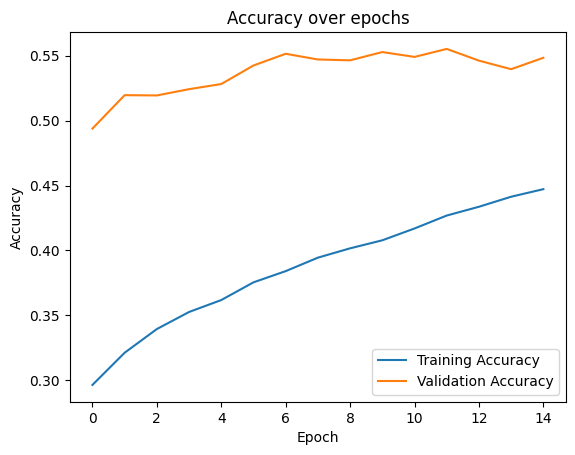

285/285 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5314 - loss: 1.4255
Test Loss: 1.7226
Test Accuracy: 0.4752


In [34]:
batch_size = 50
epochs = 15

history = model.fit(
    X_train, y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val_cat),
    shuffle=True,
    verbose=1
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

score = model.evaluate(X_test, y_test_cat, verbose=1)
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

This model underfits because it is too simple relative to the complexity of the dataset.

It uses:
 - Only two convolution layers (60 and 30 filters) 
 - Small filter sizes (5X5) 
 - A relatively small Dense layer (500 units) 
 - Dropout, which further reduces model capacity 
 - Just 570 thousands of total parameters 

Because the model does not have enough representational power, it cannot fully learn the complex patterns in CIFAR-10/100 images. This leads to:

 - Training accuracy remaining low (≈45%)
 - Validation accuracy higher than training accuracy
 - Loss curves that gradually decrease but never converge
 - These are classic signs of an underfit.

### Model Training (Overfitting)

In [ ]:

def leNet_model_overfit():
    model = Sequential()
    model.add(Conv2D(60, (3,3), input_shape=(32,32,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(120, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model_over = leNet_model_overfit()
model_over.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1000)           │     4,609,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 24)             │        12,024 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,196,020 (19.82 MB)

 Trainable params: 5,196,020 (19.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 233s 110ms/step - accuracy: 0.2768 - loss: 2.2747 - val_accuracy: 0.5277 - val_loss: 1.4111
Epoch 2/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 260s 126ms/step - accuracy: 0.3845 - loss: 1.9197 - val_accuracy: 0.5545 - val_loss: 1.3928
Epoch 3/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 250s 120ms/step - accuracy: 0.4501 - loss: 1.7037 - val_accuracy: 0.5822 - val_loss: 1.2696
Epoch 4/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 270s 124ms/step - accuracy: 0.5157 - loss: 1.4825 - val_accuracy: 0.5563 - val_loss: 1.3477
Epoch 5/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 260s 125ms/step - accuracy: 0.5910 - loss: 1.2433 - val_accuracy: 0.5714 - val_loss: 1.3216
Epoch 6/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 265s 128ms/step - accuracy: 0.6689 - loss: 0.9961 - val_accuracy: 0.5637 - val_loss: 1.3779
Epoch 7/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 283s 136ms/step - accuracy: 0.7414 - loss: 0.7691 - val_accuracy: 0.5305 - val_loss: 1.5606
Epoch 8/15
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 214s 104ms/step - ac

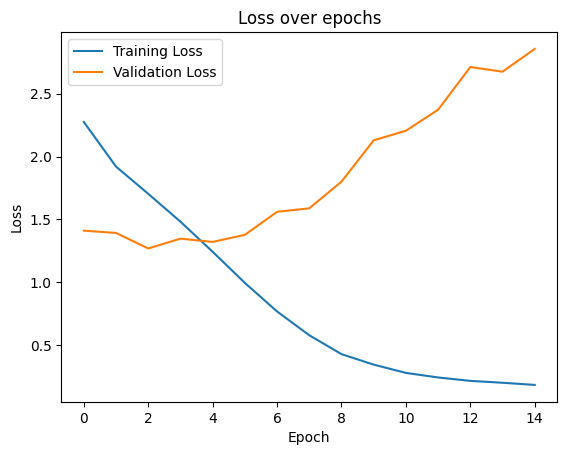

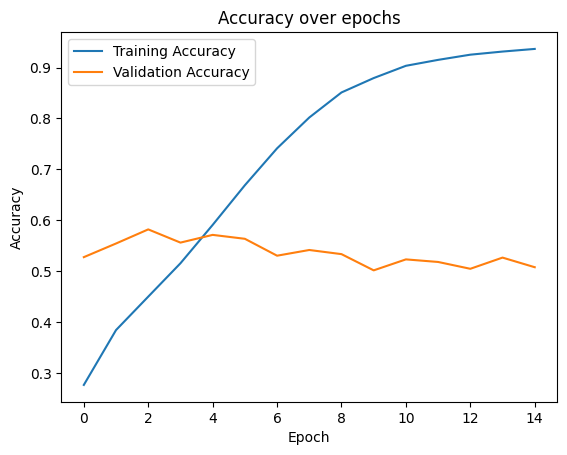

285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0944 - loss: 3.1563
Test Loss: 3.1563
Test Accuracy: 0.0944


In [33]:
batch_size = 50
epochs = 15

history = model_over.fit(
    X_train, y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val_cat),
    shuffle=True,
    verbose=1
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

score = model.evaluate(X_test, y_test_cat, verbose=1)
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

This model overfits because it is too powerful for the size of the training dataset. 

It uses:

 - More convolution filters (60 and 120 vs. 60 and 30)
 - Much larger Dense layers (1000 and 500 units)
 - No dropout
 - Over 1.7 million trainable parameters

The model easily memorizes the training data, resulting in:

 - Training accuracy climbing above 95%
 - Validation accuracy stagnating or decreasing
 - Validation loss increasing while training loss decreases

These patterns indicate that the model is learning noise and overfitting rather than generalizing.